# IMPORT LIBRARY

In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# INISIAL PARAMETER

In [2]:
BATCH_SIZE = 16
IMAGE_SIZE = 256
# Images are RGB
CHANNELS=3
EPOCHS=40

# LOAD DATASET

Found 607 files belonging to 5 classes.


In [4]:
class_names=dataset.class_names
class_names

['Black spot', 'Canker', 'Greening', 'Healthy', 'Melanose']

# SPLIT DATASET

In [5]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(16, 256, 256, 3)
[0 0 0 2 0 1 0 0 2 1 0 2 0 0 1 1]


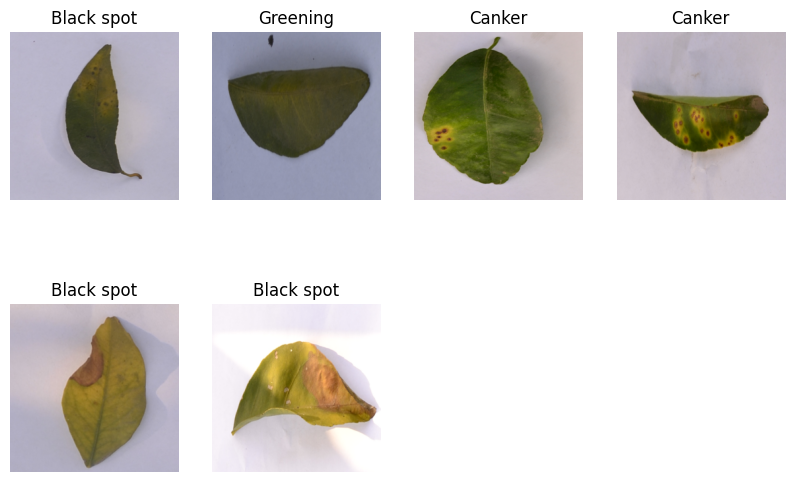

MENAMPILKAN 6 HASIL TRAINING PERTAMA

In [7]:
len(dataset)

# MENGHITUNG JUMLAH BATCH DALAM DATASET

38

In [8]:
# 80% = training
# 10% validation
# 10% test
train_size = 0.8
len(dataset)*train_size

30.400000000000002

In [9]:
16*40

640

In [10]:
train_ds = dataset.take(30)
len(train_ds)

30

In [11]:
test_ds = dataset.skip(30)
len(test_ds)

8

In [12]:
val_size=0.1
len(dataset)*val_size

3.8000000000000003

In [13]:
val_ds = test_ds.take(3)
len(val_ds)

3

In [14]:
test_ds = test_ds.skip(3)
len(test_ds)

5

In [15]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [16]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [17]:
len(train_ds)

30

In [18]:
len(val_ds)

3

In [19]:
len(test_ds)

5

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# PREPROCESSING DAN AUGMENTASI

In [22]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [23]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

# CNN NODEL

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (16, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (16, 254, 254, 32)        896       
                                                                 
 batch_normalization (BatchN  (16, 254, 254, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (16, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (16, 125, 125, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (16, 125, 125, 64)      

In [26]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# TRAINING MODEL

Epoch 1/40
30/30 [==============================] - 14s 166ms/step - loss: 1.5671 - accuracy: 0.4530 - val_loss: 1.4253 - val_accuracy: 0.5208
Epoch 2/40
30/30 [==============================] - 4s 120ms/step - loss: 0.9435 - accuracy: 0.6242 - val_loss: 1.8923 - val_accuracy: 0.3333
Epoch 3/40
30/30 [==============================] - 4s 119ms/step - loss: 0.8463 - accuracy: 0.6764 - val_loss: 2.4473 - val_accuracy: 0.3333
Epoch 4/40
30/30 [==============================] - 4s 116ms/step - loss: 0.6106 - accuracy: 0.7704 - val_loss: 2.9080 - val_accuracy: 0.3333
Epoch 5/40
30/30 [==============================] - 4s 119ms/step - loss: 0.5592 - accuracy: 0.8079 - val_loss: 2.9032 - val_accuracy: 0.2917
Epoch 6/40
30/30 [==============================] - 4s 119ms/step - loss: 0.5272 - accuracy: 0.7954 - val_loss: 2.5587 - val_accuracy: 0.3333
Epoch 7/40
30/30 [==============================] - 4s 119ms/step - loss: 0.5253 - accuracy: 0.7996 - val_loss: 1.5127 - val_accuracy: 0.3750
Epoch

# EVALUASI

In [28]:
scores = model.evaluate(test_ds)

5/5 [==============================] - 1s 11ms/step - loss: 2.8791 - accuracy: 0.4375


In [29]:
scores

[2.879077196121216, 0.4375]

In [30]:
history

In [31]:
history.params

{'verbose': 1, 'epochs': 40, 'steps': 30}

In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [33]:
type(history.history['loss'])

list

In [34]:
len(history.history['loss'])


40

In [35]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.5670802593231201,
 0.9434610605239868,
 0.8463015556335449,
 0.6105668544769287,
 0.5592234134674072]

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

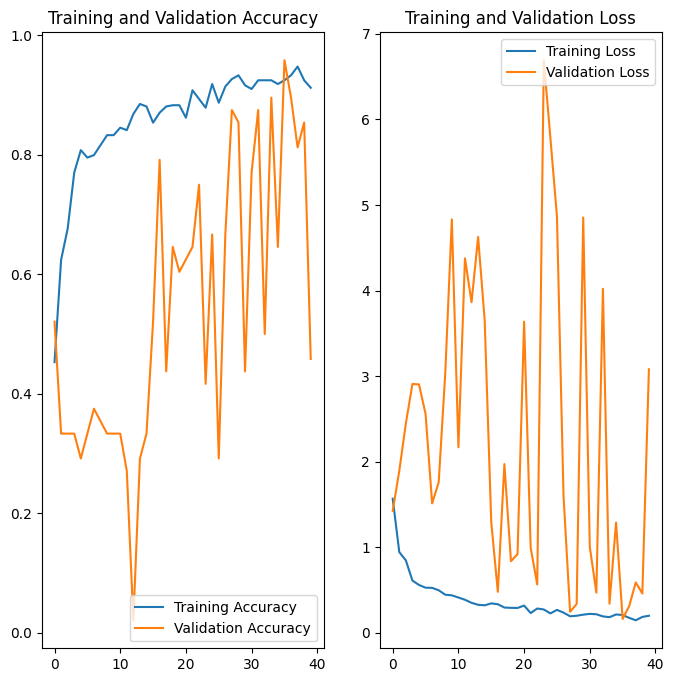

first image to predict
actual label: Greening
1/1 [==============================] - 0s 175ms/step
predicted label: Greening


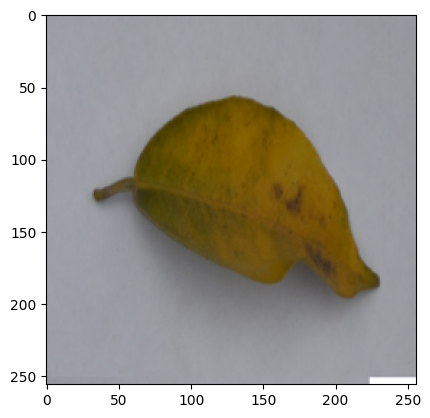

In [38]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [39]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 18ms/step


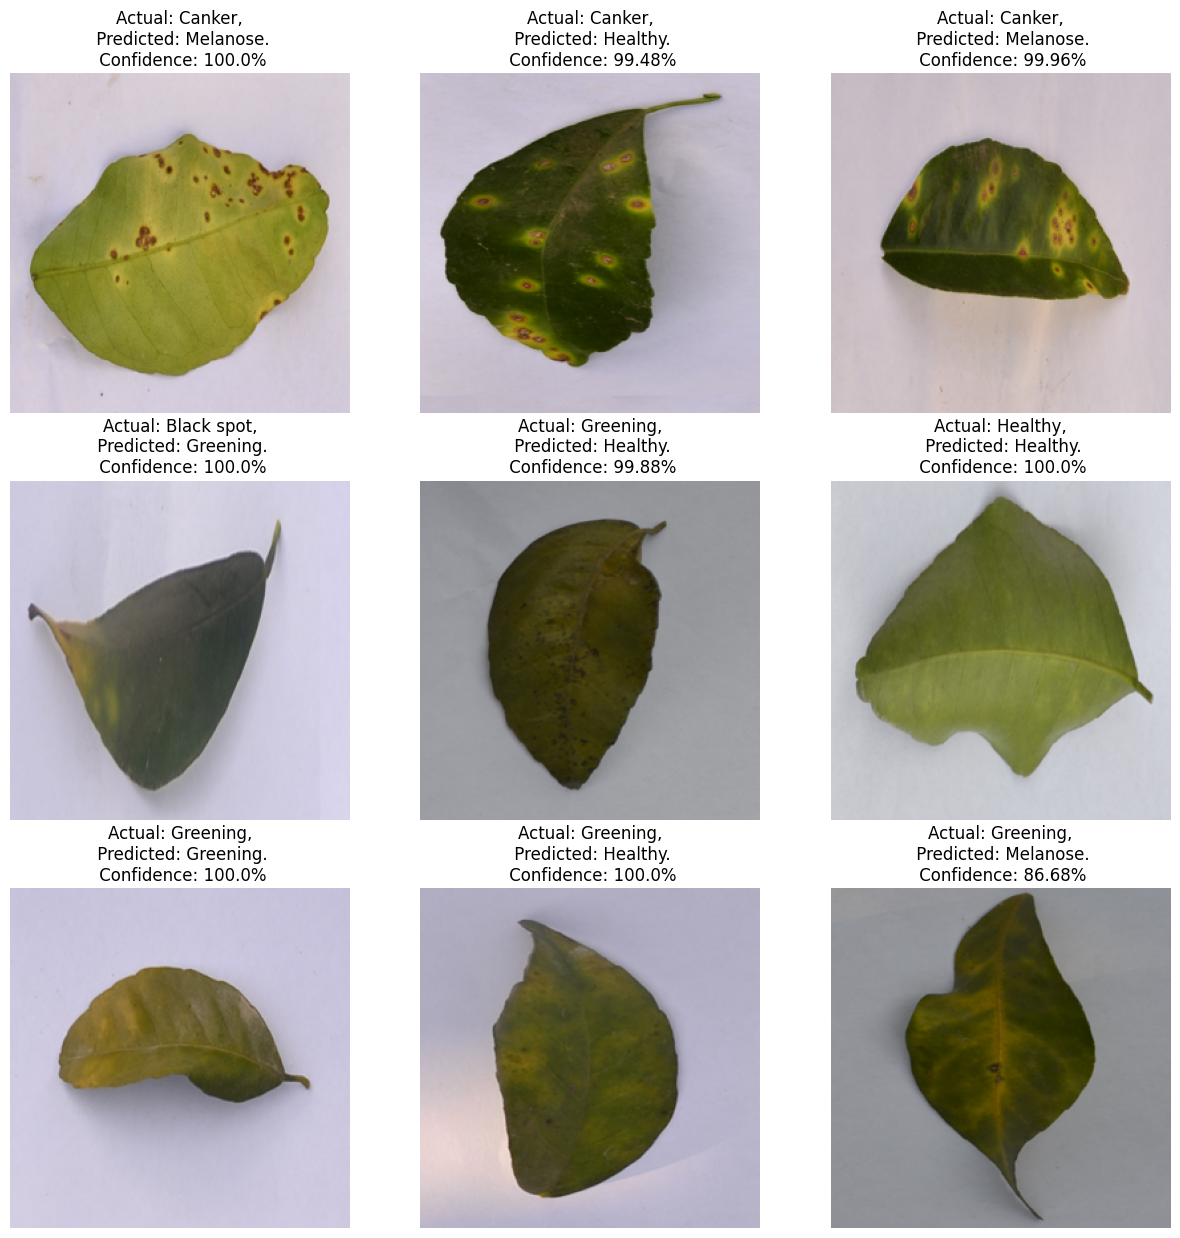

In [41]:
# import os
# model_version=max([int(i) for i in os.listdir("/kaggle/working/") + [0]])+1
# model.save(f"/kaggle/working/{model_version}")

In [42]:
# model.save("../citrus.h5")